<a href="https://colab.research.google.com/github/namanmodani/acm-ai-beginner/blob/main/multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

In [ ]:
# load the iris dataset
X, y = load_iris(return_X_y=True)

In [ ]:
print('X has shape:', X.shape)
print('y has shape:', y.shape)

X has shape: (150, 4)
y has shape: (150,)


In [ ]:
# drop the last 2 features (we'll work in 2D for now)
X = X[:, :2]
print('X has shape:', X.shape)

X has shape: (150, 2)


# Let's tackle binary classification first

In [ ]:
# drop all the data that has label 2
def convert_to_binary(X, y):
  y01 = (y != 2)
  X = X[y01, :]
  y = y[y01]
  return X, y

In [ ]:
X_bin, y_bin = convert_to_binary(X, y)
print('X_bin has shape:', X_bin.shape)
print('y_bin has shape:', y_bin.shape)

X_bin has shape: (100, 2)
y_bin has shape: (100,)


In [ ]:
def plot_data(X, y):
  y0 = (y == 0)
  y1 = (y == 1)
  y2 = (y == 2)

  plt.figure(figsize=[8, 6])
  plt.xlabel('sepal length (cm)')
  plt.ylabel('sepal width (cm)')
  plt.scatter(X[y0, 0], X[y0, 1], c='b', label='Class 0')
  plt.scatter(X[y1, 0], X[y1, 1], c='r', label='Class 1')
  plt.scatter(X[y2, 0], X[y2, 1], c='g', label='Class 2')
  plt.legend()

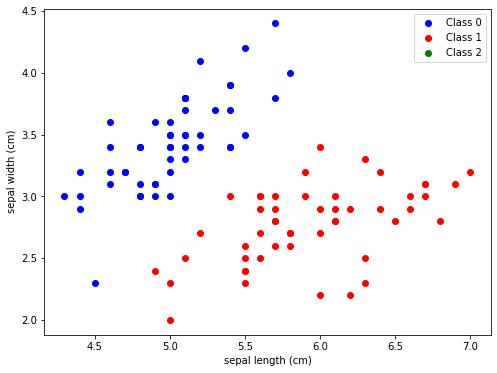

In [ ]:
# plot_data on X_bin, y_bin
plot_data(X_bin, y_bin)

In [ ]:
# split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_bin, y_bin, test_size=0.2, random_state=9)

In [ ]:
# fit the logistic regression to X_train, y_train
binary_model = LogisticRegression().fit(X_train, y_train)

In [ ]:
# print accuracy on test data
acc = binary_model.score(X_test, y_test)
print('Test accuracy:', acc)

Test accuracy: 0.95


In [ ]:
# get model weights
binary_model.coef_

array([[ 2.88868978, -2.72919824]])

In [ ]:
# get model bias
binary_model.intercept_

array([-7.07994242])

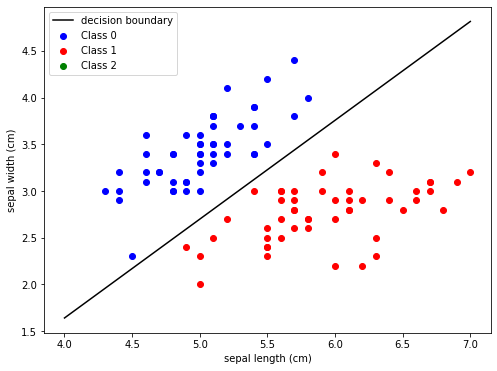

In [ ]:
# plot decision boundary of model
plot_data(X_bin, y_bin)
slope = - (binary_model.coef_[:, 0]/binary_model.coef_[:, 1])
intercept = - (binary_model.intercept_[0]/binary_model.coef_[:, 1])
X_plot = np.arange(4, 8)
y_plot = slope * X_plot + intercept

# plot X_plot, y_plot with plt.plot()
plt.plot(X_plot, y_plot, c='black', label='decision boundary')
plt.legend()

# Let's tackle multiclass classification

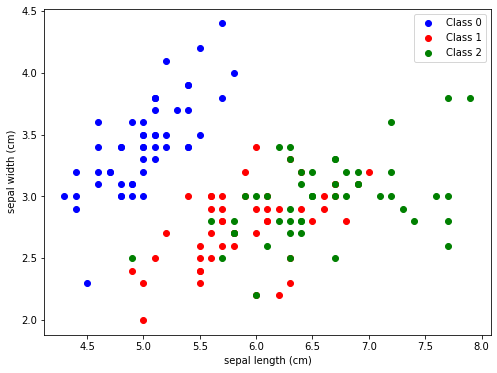

In [ ]:
# plot data
plot_data(X, y)

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [ ]:
# train
multiclass_model = LogisticRegression().fit(X_train, y_train)

In [ ]:
acc = multiclass_model.score(X_test, y_test)
print('Test accuracy:', acc)

Test accuracy: 0.9333333333333333


In [ ]:
# get model parameters
print(f'Model weights:\n{multiclass_model.coef_}\n')
print(f'Model bias:\n{multiclass_model.intercept_}')

Model weights:
[[-2.50280394  2.16157087]
 [ 0.62272951 -1.44206518]
 [ 1.88007444 -0.71950568]]

Model bias:
[ 7.18105479  1.37277873 -8.55383352]


**Pay attention to the shape of the weights and bias**

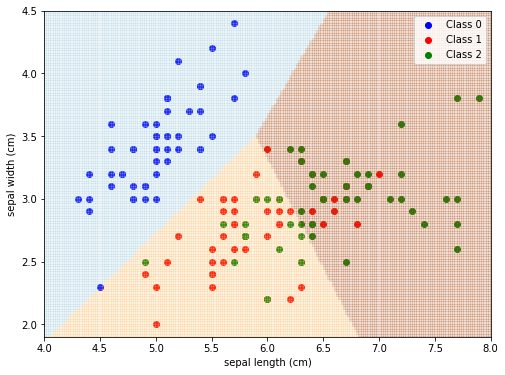

In [ ]:
# visualize results
plot_data(X, y)
plt.xlim(4, 8)
plt.ylim(1.9, 4.5)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = multiclass_model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

plt.legend()

**Unfortunately, the decision boundary is NOT able to separate the data perfectly (hence, the 90% accuracy). The main reason being the data from class 1 and class 2 are NOT linearly separable.**